# Importing the Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Checking for missing values






In [ ]:
diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
#Check for any null values
diabetes_dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

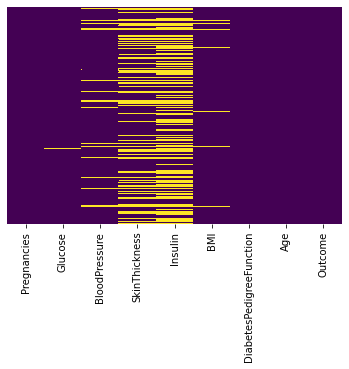

In [ ]:
 sns.heatmap(diabetes_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Filling by mean values
diabetes_dataset['Glucose'].fillna(diabetes_dataset['Glucose'].mean(), inplace = True)
diabetes_dataset['BloodPressure'].fillna(diabetes_dataset['BloodPressure'].mean(), inplace = True)
diabetes_dataset['SkinThickness'].fillna(diabetes_dataset['SkinThickness'].mean(), inplace = True)
diabetes_dataset['Insulin'].fillna(diabetes_dataset['Insulin'].mean(), inplace = True)
diabetes_dataset['BMI'].fillna(diabetes_dataset['BMI'].mean(), inplace = True)


In [ ]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Filling by Median Values
def median_target(var):
    temp = diabetes_dataset[diabetes_dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
columns = diabetes_dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0 ) & (diabetes_dataset[i].isnull()), i] = median_target(i)[i][0]
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1 ) & (diabetes_dataset[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

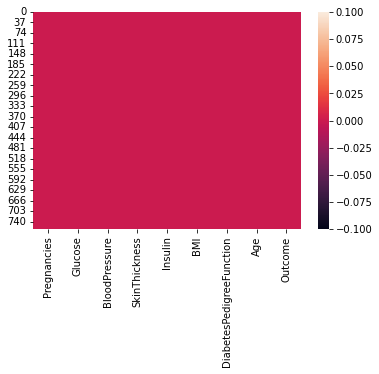

In [ ]:
sns.heatmap(diabetes_dataset.isnull())

# Correlation Matrix

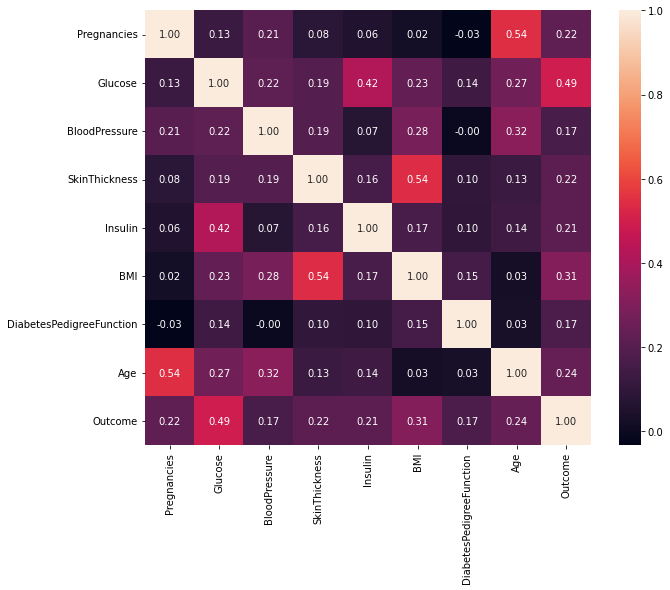

In [ ]:
correlation = diabetes_dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_dataset.corr(),annot=True, fmt = ".2f")
#sns.heatmap(correlation)

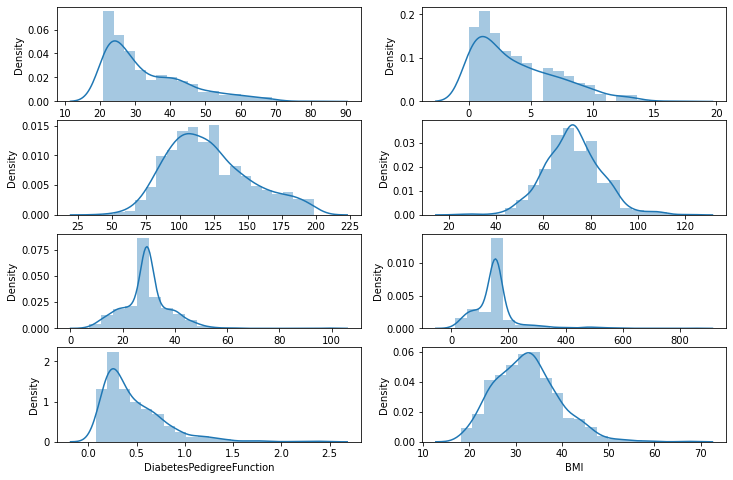

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,8))
sns.distplot(diabetes_dataset.Age, bins = 20, ax=ax[0,0])
sns.distplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(diabetes_dataset.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(diabetes_dataset.BMI, bins = 20, ax=ax[3,1])

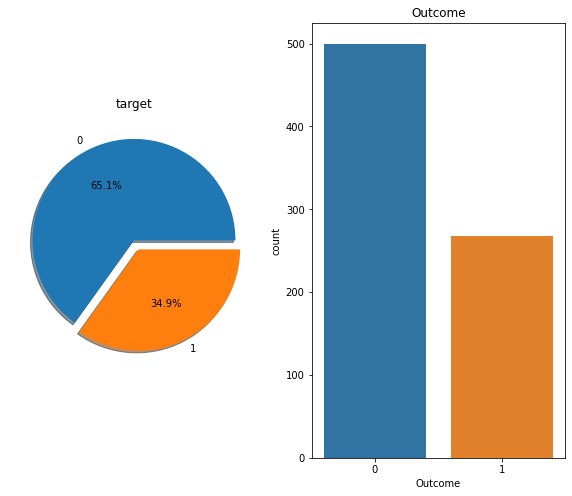

In [ ]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(10,8))
diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=diabetes_dataset,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

# Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=10)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


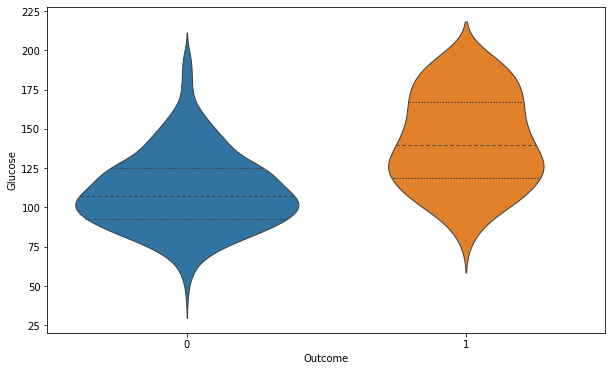

In [ ]:
# Explore Gluecose vs Outcome
plt.figure(figsize=(10,6))
sns.violinplot(data=diabetes_dataset, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

# **Training the Model**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_log=lr.predict(X_test)
log_acc = accuracy_score(Y_test,Y_pred_log) * 100
print("Logistic Regression Accuracy Score is:", log_acc )


Logistic Regression Accuracy Score is: 81.16883116883116


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_log = confusion_matrix(Y_test, Y_pred_log)
print("Confusion Matrix\n",cm_log,"\n")
print("Classification Report\n",classification_report(Y_test,Y_pred_log))

Confusion Matrix
 [[88 12]
 [17 37]] 

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.76      0.69      0.72        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154




**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
dt.fit(X_train,Y_train)
Y_pred_dt=dt.predict(X_test)
Dec_tree_acc = accuracy_score(Y_test,Y_pred_dt) * 100
print("Decision Trees Accuracy Score is:" , Dec_tree_acc  )

Decision Trees Accuracy Score is: 70.77922077922078


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix\n",cm_dt,"\n")
print("Classification Report\n",classification_report(Y_test,Y_pred_dt))

Confusion Matrix
 [[75 25]
 [20 34]] 

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       100
           1       0.58      0.63      0.60        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



**Random Forest Classifier**


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 100)
ranfor.fit(X_train, Y_train)
Y_pred_rf=ranfor.predict(X_test)
ran_for_acc = accuracy_score(Y_test,Y_pred_rf) * 100
print("Random Forest Accuracy Score is:" , ran_for_acc )

Random Forest Accuracy Score is: 77.92207792207793


In [ ]:
#Random Forest for different Estimators
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, Y_train)
    rf_scores.append(rf_classifier.score(X_test, Y_test) * 100)

print("Random Forest Scores", rf_scores)

Random Forest Scores [77.27272727272727, 79.22077922077922, 77.92207792207793, 77.92207792207793, 79.22077922077922]


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

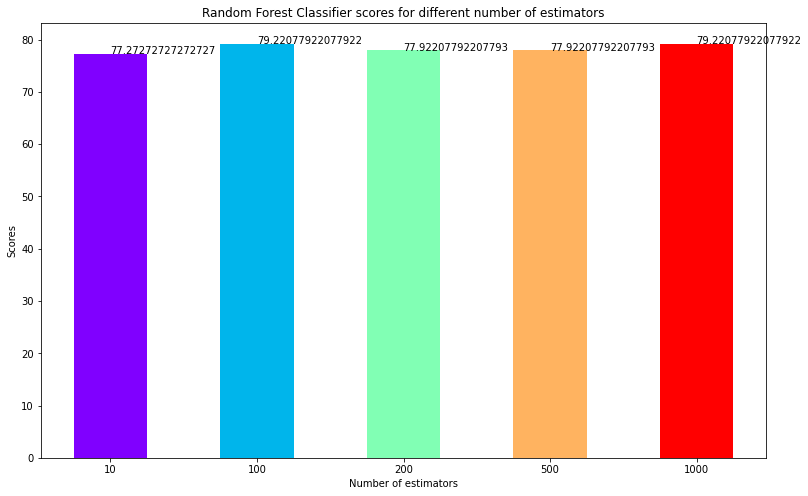

In [ ]:
#Bar plot of Random Forest with Different Estimators
from matplotlib.cm import rainbow
colors = rainbow(np.linspace(0, 1, len(estimators)))
f, ax = plt.subplots(figsize=(13,8))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
#Random Forest using GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf_grid = GridSearchCV(estimator=ranfor, param_grid=param_grid, cv= 5)
rf_grid.fit(X_train, Y_train)
print("Best Parameters of Random Forest:", rf_grid.best_params_)
print("Best Accuracy Score is:", rf_grid.best_score_)


Best Parameters of Random Forest: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
Best Accuracy Score is: 0.7703851792616286


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix\n",cm_rf,"\n")
print("Classification Report\n",classification_report(Y_test,Y_pred_rf))

Confusion Matrix
 [[83 17]
 [17 37]] 

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       100
           1       0.69      0.69      0.69        54

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



**KNN - Classifier**

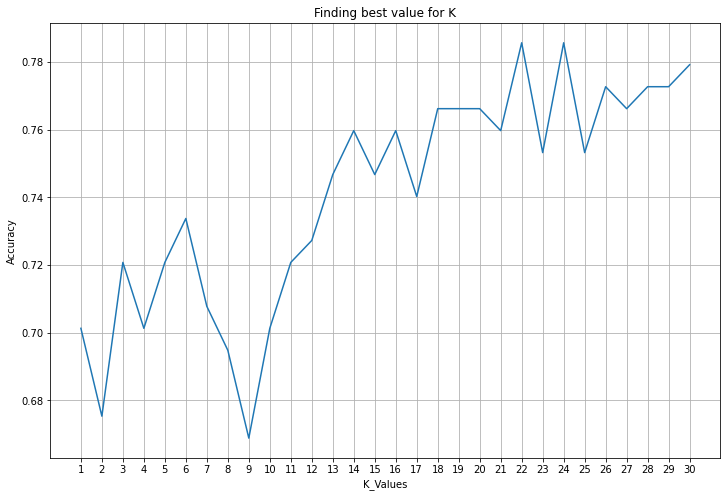

Highest value:  0.7857142857142857


In [ ]:
#KNN classifier using different K values
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
f, ax = plt.subplots(figsize=(12,8))
plt.plot(x, acc)
plt.xticks(x)
plt.title("Finding best value for K")
plt.xlabel("K_Values")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
# K nearest neighbors Algorithm with K = 22
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 22)
knn.fit(X_train, Y_train)
Y_pred_knn=knn.predict(X_test)
knn_acc = accuracy_score(Y_test,Y_pred_knn) * 100
print("Knn Accuracy Score is:" , knn_acc  )

Knn Accuracy Score is: 78.57142857142857


In [ ]:
#KNN using GridSearchCv
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": range(1, 31)}
knn_gscv = GridSearchCV(knn, param_grid)
knn_gscv.fit(X_train, Y_train)

print("Best K- Value is:", knn_gscv.best_params_)
print("Knn - Score is:", knn_gscv.best_score_)

Best K- Value is: {'n_neighbors': 23}
Knn - Score is: 0.75083300013328


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix\n",cm_knn,"\n")
print("Classification Report\n",classification_report(Y_test,Y_pred_knn))

Confusion Matrix
 [[90 10]
 [23 31]] 

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.57      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



**Support Vector Classifier**


In [ ]:
#SVM classifier - Linear kernel
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
Y_pred_svm = classifier.predict(X_test)
svm_acc = accuracy_score(Y_pred_svm, Y_test) * 100
print('SVM Accuracy Score is : ', svm_acc)

SVM Accuracy Score is :  82.46753246753246


In [ ]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test)*100)
print("SVC Scores :",svc_scores)

SVC Scores : [82.46753246753246, 77.92207792207793, 78.57142857142857, 74.02597402597402]


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

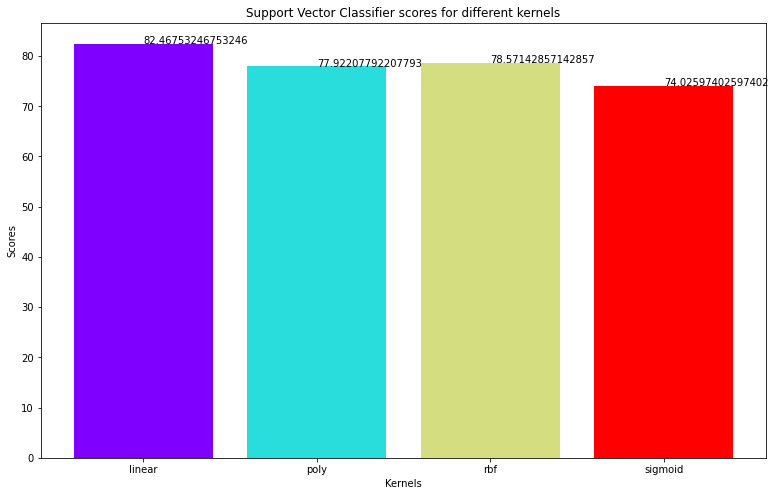

In [ ]:
from matplotlib.cm import rainbow
f, ax = plt.subplots(figsize=(13,8))
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


In [ ]:
#SVM using GridsearchCv
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['rbf','linear','sigmoid','poly']}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, Y_train)
grid_predictions = grid.predict(X_test)
print('Best Parameters',grid.best_params_)
print('Accuracy score:', accuracy_score(Y_test, grid_predictions)*100)

Best Parameters {'kernel': 'linear'}
Accuracy score: 82.46753246753246


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix\n",cm_svm,"\n")
print("Classification Report\n",classification_report(Y_test,Y_pred_svm))

Confusion Matrix
 [[91  9]
 [18 36]] 

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.80      0.67      0.73        54

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



# **MODELS COMPARISION**



In [ ]:
print("MODELS COMPARISION\n")
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(criterion = 'entropy', random_state = 50),
               RandomForestClassifier(n_estimators = 500),
               KNeighborsClassifier(n_neighbors = 22),
               SVC(kernel='linear')]

logs_col = ["Classifiers","Accuracy"]
log = pd.DataFrame(columns = logs_col)

for clf in classifiers:
  clf.fit(X_train,Y_train)
  name = clf.__class__.__name__

  print(name)

  Predictions = clf.predict(X_test)
  acc = accuracy_score(Y_test,Predictions)
  print("Accuracy:",acc)
  print(" ")

MODELS COMPARISION

LogisticRegression
Accuracy: 0.8116883116883117
 
DecisionTreeClassifier
Accuracy: 0.7077922077922078
 
RandomForestClassifier
Accuracy: 0.7987012987012987
 
KNeighborsClassifier
Accuracy: 0.7857142857142857
 
SVC
Accuracy: 0.8246753246753247
 


Making a Predictive System

In [ ]:
import warnings
warnings.filterwarnings('ignore')

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
